<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).


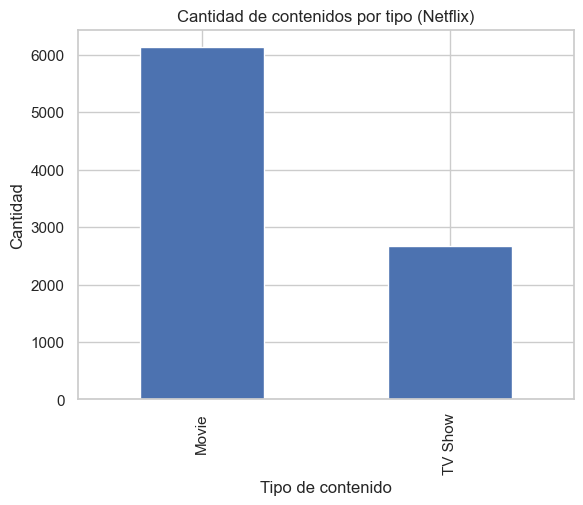

In [78]:
# PARTE 1
# Copia y limpieza básica
df_copia = df.copy()
df_copia["type"] = df_copia["type"].str.strip()

# Conteo por tipo
conteo = df_copia["type"].value_counts()
#print(conteo)

# Gráfico de barras (pandas + matplotlib)

conteo.plot(kind="bar")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.title("Cantidad de contenidos por tipo (Netflix)")
plt.show()

   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?
   * Cómo en el catálogo predominan las películas, esto podría tener implicancias como consumo unitario o quizás sesiones más cortas.



2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.


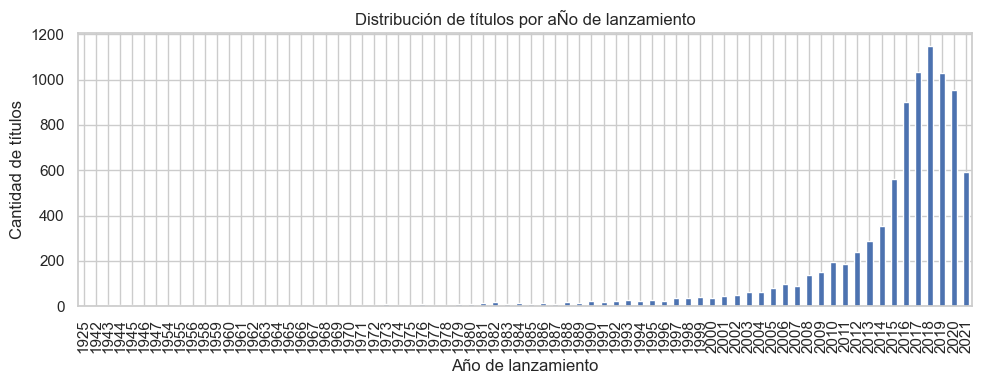

In [24]:
# PARTE 2
df_copia = df.copy()
df_copia["release_year"] = pd.to_numeric(df_copia["release_year"])
#print(df_copia["release_year"])

#quitamos filas sin año y las pasamos a entero
df_copia = df_copia[pd.notna(df_copia["release_year"])].copy()
df_copia["release_year"] = df_copia["release_year"].astype(int)

#conteo en los aÑos

conteo_anio = df_copia["release_year"].value_counts().sort_index()
#print(conteo_anio.head())
#print(conteo_anio.tail())
#gráficos
conteo_anio.plot(kind="bar", figsize=(10,4))
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos") 
plt.title("Distribución de títulos por aÑo de lanzamiento")
plt.tight_layout()
plt.show()

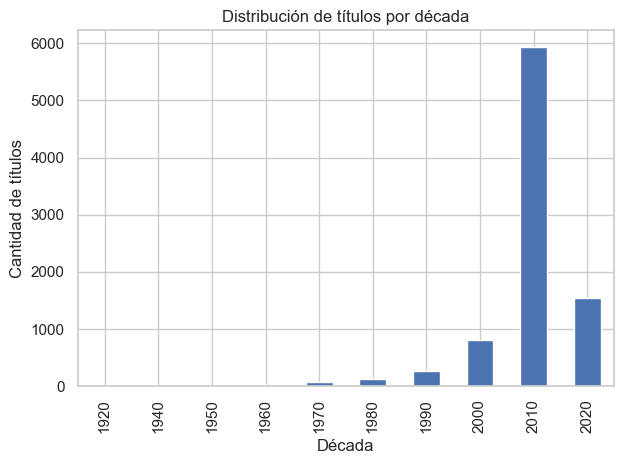

In [29]:
df_copia["decada"] = (df["release_year"]//10)*10
conteo_decada = df_copia["decada"].value_counts().sort_index()
#print(conteo_decada)

conteo_decada.plot(kind="bar")
plt.xlabel("Década")
plt.ylabel("Cantidad de títulos")
plt.title("Distribución de títulos por década")
plt.tight_layout()
plt.show()

   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?
   * Es evidente que hay más contenido reciente, por supuesto por el creciemiento social del alcance de la tecnología. Notar que, sin considerar el creciemiento de la cantidad de títulos lanzados, es notorío que en los años 2018-2021 se alcanzan los peaks, esto debe ser por el auge tecnológico en combinación  con una estabilidad económica mundial para luego la pandemia.



3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   

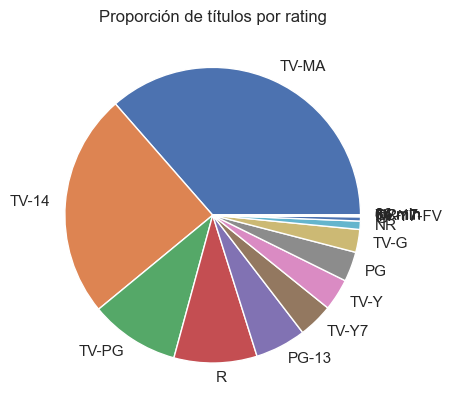

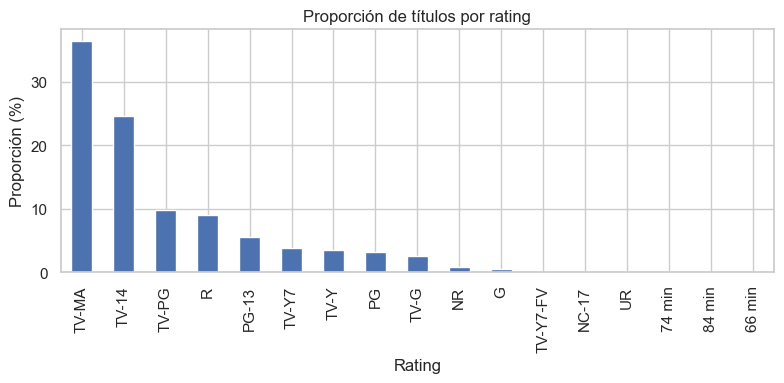

In [40]:
# PARTE 3

#Cálculo de las proporciones
prop = df_copia["rating"].value_counts(normalize =True).sort_values(ascending=False)
#print((prop*100).round(2))

# Gráficos circular 
prop.plot(kind= "pie")
plt.ylabel("")
plt.title("Proporción de títulos por rating")
plt.show()

#Gráfico de barras
(prop * 100).plot(kind="bar", figsize=(8, 4))
plt.xlabel("Rating")
plt.ylabel("Proporción (%)")
plt.title("Proporción de títulos por rating")
plt.tight_layout()
plt.show()



* Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?
* Por lo resultados de ambos gráficos, es notorío que: la clasificación más común es TV-MA, TV-14, TV-PG. Con esto, se puede conlcuir que Netflix está muy enfocado en un público más adulta y familiar.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   

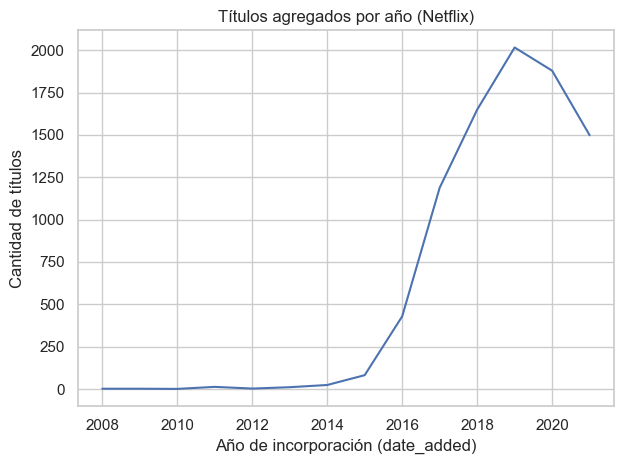

In [48]:
df_copia = df.copy()
df_copia["date_added"] = df_copia["date_added"].astype(str).str.strip()
df_copia["date_added"] = pd.to_datetime(df_copia["date_added"])

# Quitamos filas sin fecha y obtenemos el aÑo

df_copia = df_copia[pd.notna(df_copia["date_added"])].copy()
df_copia["year_added"] = df_copia["date_added"].dt.year

#Contamos por aÑo

conteo_anio = df_copia["year_added"].value_counts().sort_index()
#print(conteo_anio)

conteo_anio.plot(kind ="line")
plt.xlabel("Año de incorporación (date_added)")
plt.ylabel("Cantidad de títulos")
plt.title("Títulos agregados por año (Netflix)")
plt.tight_layout()
plt.show()

* Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?
* Netflix mostró crecimiento positivo hasta el 2019 llegando casi a los 2000 títulos, sin embargo, desde tal año la cantidad de títulos que esta plataforma tiene ha decrecido notablemente.



5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   

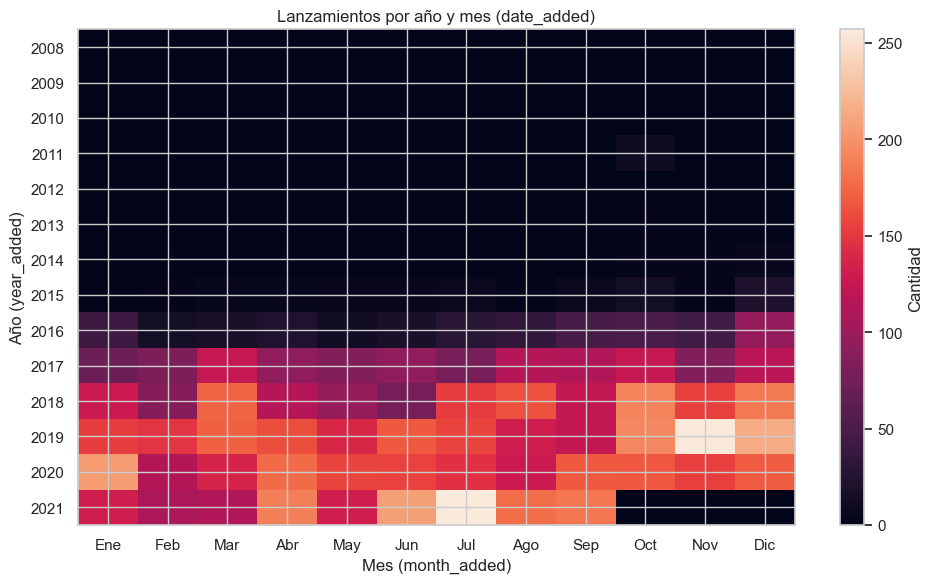

In [57]:
df_copia = df.copy()
df_copia["date_added"] = df_copia["date_added"].astype(str).str.strip()
df_copia["date_added"] = pd.to_datetime(df_copia["date_added"])
df_copia = df_copia[pd.notna(df_copia["date_added"])].copy()

# Variables de año y mes
df_copia["year_added"] = df_copia["date_added"].dt.year
df_copia["month_added"] = df_copia["date_added"].dt.month

# Tabla año x mes (conteos)
tabla = df_copia.groupby(["year_added", "month_added"]).size().unstack(fill_value=0)

# Asegurar orden de meses 1..12
meses = list(range(1, 13))
tabla = tabla.reindex(columns=meses, fill_value=0).sort_index()

# Nombres de meses (etiquetas)
nombres_meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
plt.figure(figsize=(10, 6))
plt.imshow(tabla.values, aspect="auto")
plt.colorbar(label="Cantidad")
plt.xticks(range(len(meses)), nombres_meses)
plt.yticks(range(len(tabla.index)), tabla.index)
plt.xlabel("Mes (month_added)")
plt.ylabel("Año (year_added)")
plt.title("Lanzamientos por año y mes (date_added)")
plt.tight_layout()
plt.show()


* Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?
* Del heatmap es claro  que hay meses con más estrenos, por ejemplo octubre-noviembre- diciembre/ Julio/ Enero. Notar que la estacionalidad de los lanzamientos tienden hacia el fin de año, por vacaciones, fiestas y campañas.

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
  

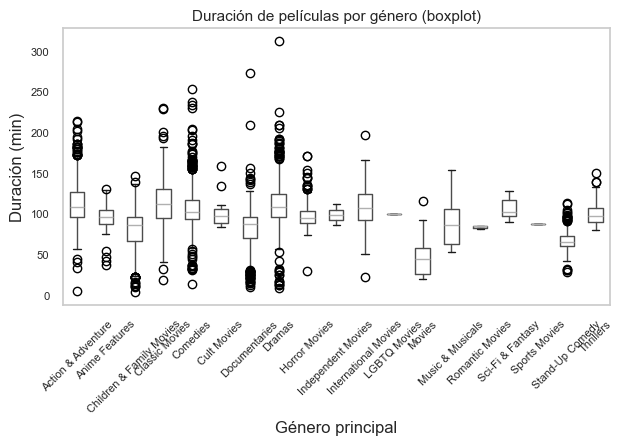

In [65]:
df_copia = df.copy()
df_copia["type"] = df_copia["type"].astype(str).str.strip()
df_copia["duration"] = df_copia["duration"].astype(str).str.strip()
df_copia["listed_in"] = df_copia["listed_in"].astype(str).str.strip()

# Solo películas
df_copia = df_copia[df_copia["type"].str.lower() == "movie"].copy()

# Duración en minutos (por ejemplo: "90 min" -> 90)
df_copia["duration_min"] = df_copia["duration"].str.extract(r"(\d+)", expand=False)
df_copia["duration_min"] = pd.to_numeric(df_copia["duration_min"], errors="coerce")

# Género principal (primer género antes de la coma)
df_copia["genero_principal"] = df_copia["listed_in"].str.split(",").str[0].str.strip()

# Quitar nulos
ax = df_copia.boxplot(column="duration_min", by="genero_principal",
                      grid=False, rot=45)

ax.set_xlabel("Género principal")
ax.set_ylabel("Duración (min)")

# ↓ Título más pequeño y con espacio
ax.set_title("Duración de películas por género (boxplot)", fontsize=11, pad=6)
plt.suptitle("")          # quita el título automático de pandas
plt.xticks(fontsize=8)    # (opcional) letras del eje X más pequeñas
plt.yticks(fontsize=8)    # (opcional)
plt.tight_layout()



 * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?
 * Según los boxplots, los generos que suelen durar más son los Dramas, Action&Adventure, International Movies y Sci-Fi & Fantasy con diraciones de entre 100~120 min. Por otro lado, hay una alta variabilidad en: Documentales, Dramas, Independent/ International Movies y Cult Movies pues muestrab cajas más altas y muchos puntos fuera de los bigotes (hay tanto titulos cortos como largos). Los de baja variabilidad son: Stand-Up Comedy (duraciones bastante concentradas) y, en menor medida, Children & Family Movies.
 * Las películas “narrativas” (drama/acción/sci-fi) tienden a ser más largas; los especiales (stand-up) son más cortos. Géneros como documentales e independientes mezclan formatos (cortos y largos), por eso su dispersión es grande.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.




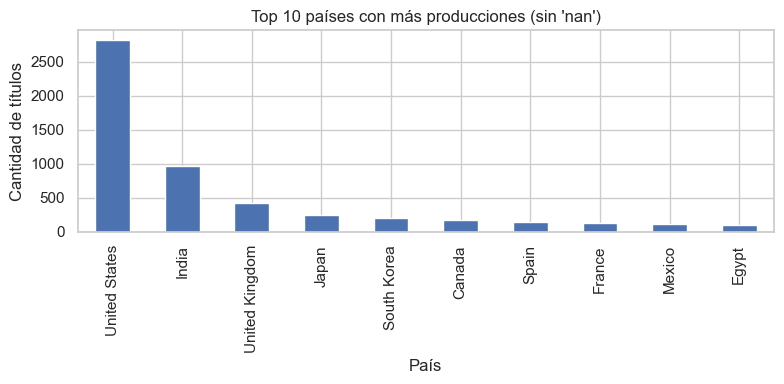

In [72]:
df_copia = df.copy()
df_copia["country"] = df_copia["country"].astype(str).str.strip()

# Limpieza (después de explode)
df_copia = df_copia[pd.notna(df_copia["country"])].copy()
df_copia["country"] = df_copia["country"].astype(str).str.strip()
df_copia = df_copia[(df_copia["country"] != "") &
                    (df_copia["country"].str.lower() != "nan")]

# Recalcula top 10 y grafica
top10 = df_copia["country"].value_counts().head(10)
#print(top10)

top10.plot(kind="bar", figsize=(8, 4))
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.title("Top 10 países con más producciones (sin 'nan')")
plt.tight_layout()
plt.show()


   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?


Los paises que dominan el catálogo son: Estados Unidos, India y Reino Unido. Sorprende que un país como India (por ser en mayoría gente de bajos recursos) tenga acceso a este tipo de plataformas, por lo demás no sorprende.


8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.



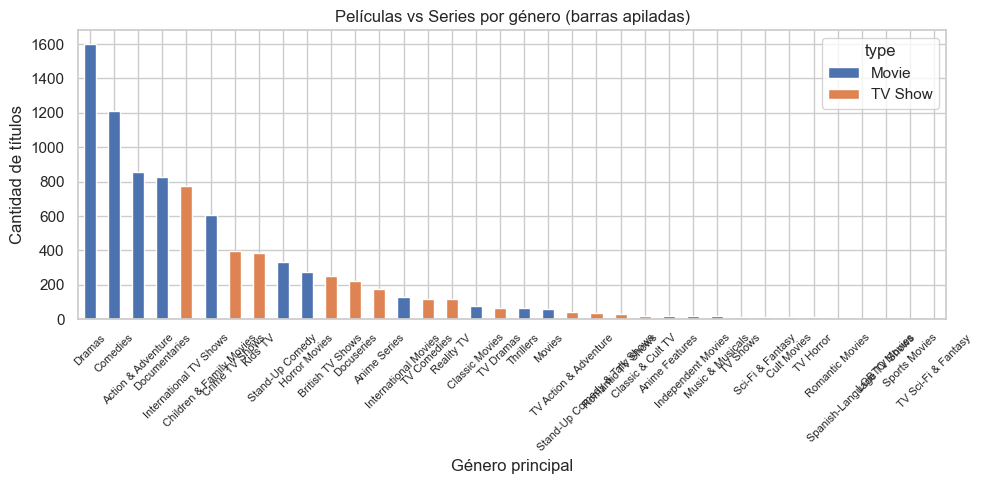

In [75]:
df_copia = df.copy()
df_copia["type"] = df_copia["type"].astype(str).str.strip()
df_copia["listed_in"] = df_copia["listed_in"].astype(str).str.strip()

# Género principal (antes de la coma)
df_copia = df_copia[df_copia["listed_in"] != ""].copy()
df_copia["genero_principal"] = df_copia["listed_in"].str.split(",").str[0].str.strip()

# Tabla género x tipo
tabla = (
    df_copia
      .groupby(["genero_principal", "type"])
      .size()
      .unstack(fill_value=0)
)

#  ordenar por total para que el gráfico sea más legible
orden = tabla.sum(axis=1).sort_values(ascending=False).index
tabla = tabla.loc[orden]

#print(tabla.head(10))  

# Gráfico de barras apiladas con letra del eje X más pequeña
ax = tabla.plot(kind="bar", stacked=True, figsize=(10, 5), rot=45)
ax.set_xlabel("Género principal")
ax.set_ylabel("Cantidad de títulos")
ax.set_title("Películas vs Series por género (barras apiladas)")

# ↓ Reduce el tamaño de las etiquetas del eje X
plt.xticks(fontsize=8)

plt.tight_layout()
plt.show()


   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?
   * Como hay una mayor concentración y cantidad de barras azules, esto quiere decir que hay mas generos asociados a peliculas.

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.


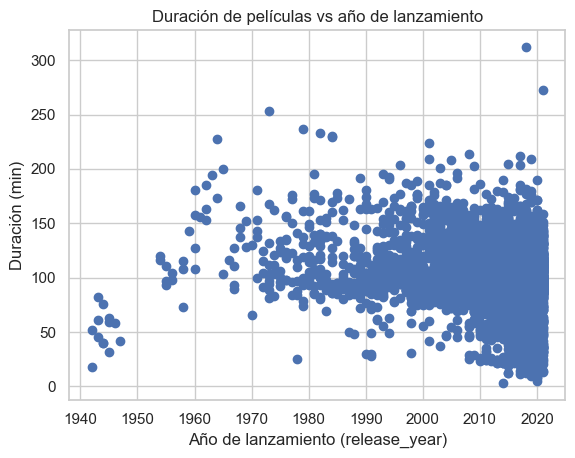

In [76]:
df_copia = df.copy()
df_copia["type"] = df_copia["type"].astype(str).str.strip()
df_copia["release_year"] = pd.to_numeric(df_copia["release_year"], errors="coerce")
df_copia["duration"] = df_copia["duration"].astype(str).str.strip()

# Usamos SOLO películas para que la duración sean minutos (en series es "X Seasons")
df_copia = df_copia[df_copia["type"].str.lower() == "movie"].copy()

# Extraer minutos desde "90 min"
df_copia["duration_min"] = pd.to_numeric(
    df_copia["duration"].str.extract(r"(\d+)", expand=False), errors="coerce"
)

# Quitar nulos
df_copia = df_copia[pd.notna(df_copia["release_year"]) & pd.notna(df_copia["duration_min"])]

# Gráfico de dispersión

plt.scatter(df_copia["release_year"], df_copia["duration_min"])
plt.xlabel("Año de lanzamiento (release_year)")
plt.ylabel("Duración (min)")
plt.title("Duración de películas vs año de lanzamiento")
plt.show()


   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?

No se ve una tendencia clara a que las películas sean más largas o más cortas con los años. La zona densa se mantiene cerca de 90–120 min en casi todo el eje del tiempo → estándar bastante estable. Lo que sí cambia es la dispersión: desde ~2000 hay más variedad (más títulos <60 min y también algunos >180 min)

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.


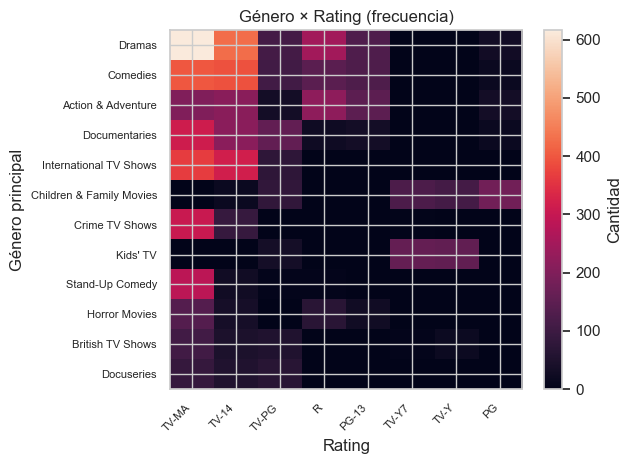

In [79]:
df_copia = df.copy()
df_copia["listed_in"] = df_copia["listed_in"].astype(str).str.strip()
df_copia["rating"]    = df_copia["rating"].astype(str).str.strip()

# Limpiar nulos/vacíos
df_copia = df_copia[(df_copia["listed_in"] != "") & (df_copia["rating"] != "")]
df_copia = df_copia[df_copia["listed_in"].str.lower() != "nan"]
df_copia = df_copia[df_copia["rating"].str.lower()    != "nan"]

# Género principal (antes de la coma)
df_copia["genero_principal"] = df_copia["listed_in"].str.split(",").str[0].str.strip()

# Conteo de combinaciones
comb = (df_copia
        .groupby(["genero_principal", "rating"])
        .size()
        .reset_index(name="n")
        .sort_values("n", ascending=False))

#print("Top 20 combinaciones género + rating:")
#print(comb.head(20))

# ---- HEATMAP (simple con matplotlib) ----
tabla = comb.pivot_table(index="genero_principal", columns="rating", values="n", fill_value=0)

top_gen = tabla.sum(axis=1).sort_values(ascending=False).head(12).index
top_rat = tabla.sum(axis=0).sort_values(ascending=False).head(8).index
mat = tabla.loc[top_gen, top_rat]


plt.imshow(mat.values, aspect="auto")
plt.colorbar(label="Cantidad")
plt.xticks(range(len(mat.columns)), mat.columns, rotation=45, ha="right", fontsize=8)
plt.yticks(range(len(mat.index)),   mat.index,   fontsize=8)
plt.xlabel("Rating")
plt.ylabel("Género principal")
plt.title("Género × Rating (frecuencia)")
plt.tight_layout()
plt.show()

* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?
* Los géneros dirigidos a un público más adulto son: Dramas, Comedies, Action & Adventure, Crime TV Shows, Horror Movies, Stand-Up Comedy, Documentaries/Docuseries, International TV Shows. Mientras que para un público más familiar: Children & Family Movies, varias Comedies y Action & Adventure “ligeras”, y parte de British TV Shows y por último para un público más infantíl es: Kids’ TV y una fracción de Children & Family Movies → concentrado en TV-Y y TV-Y7.